In [2]:
import csv
import pandas as pd

input_file = "../data/raw/listings_detailed.csv"
output_file = "../data/processed/listings_fixed.csv"

rows = []

# Step 1: Read raw CSV safely
with open(input_file, "r", encoding="utf-8", errors="replace") as f:
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)

# Step 2: Detect the correct number of columns (based on header)
expected_cols = len(rows[0])
print(f"Expected columns: {expected_cols}")

# Step 3: Fix rows with wrong number of columns
fixed_rows = []
for i, row in enumerate(rows):
    if len(row) != expected_cols:
        print(f"Fixing row {i+1}: had {len(row)} columns")
        if len(row) < expected_cols:
            # Pad missing columns
            row += [""] * (expected_cols - len(row))
        else:
            # Merge extra columns into the last one
            row = row[:expected_cols-1] + [",".join(row[expected_cols-1:])]
    fixed_rows.append(row)

# Step 4: Save fixed CSV
with open(output_file, "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerows(fixed_rows)

# Step 5: Load into pandas
data = pd.read_csv(output_file)
print("DataFrame shape:", data.shape)


Expected columns: 75
DataFrame shape: (42931, 75)


C:\Users\USER\AppData\Local\Temp\ipykernel_10360\1952502628.py:38: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(output_file)


In [3]:
# Display shape and column info
print("Shape:", data.shape)
print("\nColumn types:")
print(data.dtypes)

# Basic statistics
data.describe(include='all').T.head(10)

Shape: (42931, 75)

Column types:
id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,42931.0,NaN,NaN,NaN,222277244526372160.0,334421302203795328.0,2595.0,19404736.0,43374815.0,630501597262169088.0,840466047136140160.0
listing_url,42931,42931,https://www.airbnb.com/rooms/801749842377802394,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scrape_id,42931.0,NaN,NaN,NaN,20230306014634.0,0.0,20230306014634.0,20230306014634.0,20230306014634.0,20230306014634.0,20230306014634.0
last_scraped,42931,2,2023-03-06,29993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,42931,2,city scrape,28286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,42919,41408,Water View King Bed Hotel Room,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,42178,38021,Relax with the whole family at this peaceful p...,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighborhood_overview,24870,19578,Flatiron District<br />The triangular shape of...,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN
picture_url,42931,41814,https://a0.muscache.com/pictures/6998e77e-4564...,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,42931.0,NaN,NaN,NaN,151601209.021919,162130107.567557,1678.0,16085328.0,74338125.0,268069240.5,503872891.0


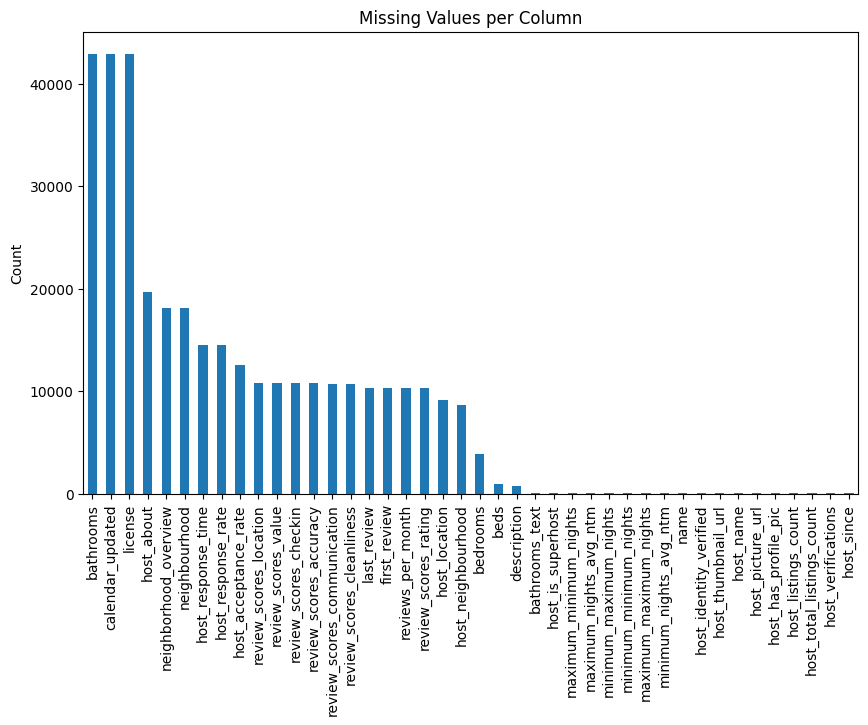

In [4]:
import matplotlib.pyplot as plt

missing = data.isna().sum().sort_values(ascending=False)
missing = missing[missing > 0]

plt.figure(figsize=(10,6))
missing.plot(kind='bar')
plt.title("Missing Values per Column")
plt.ylabel("Count")
plt.show()


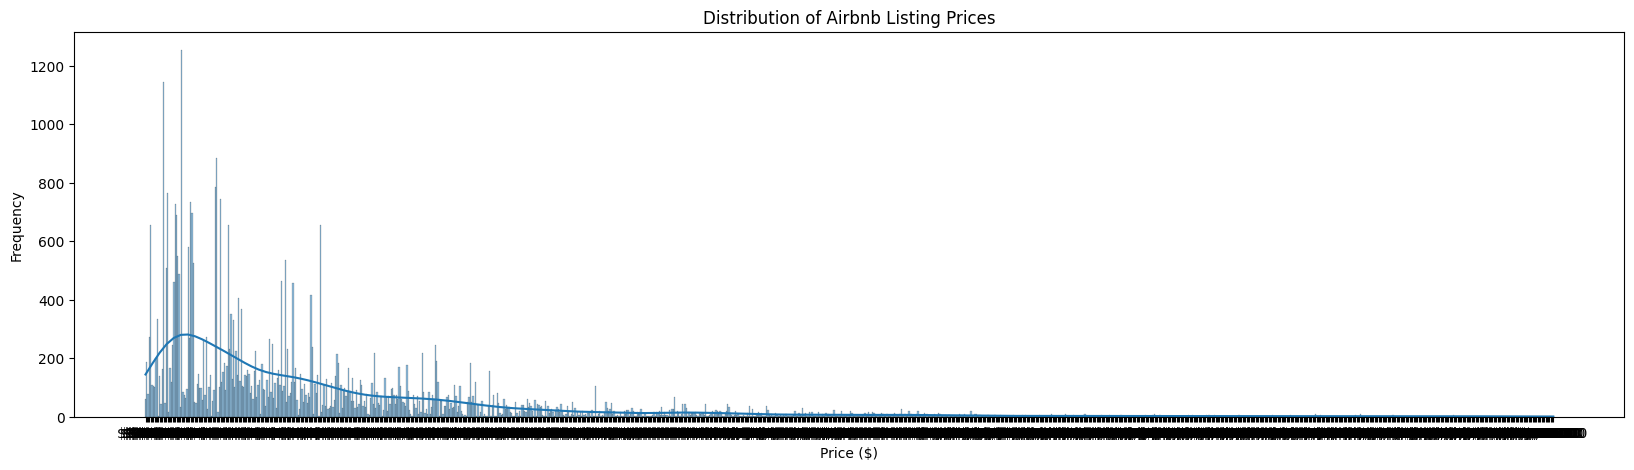

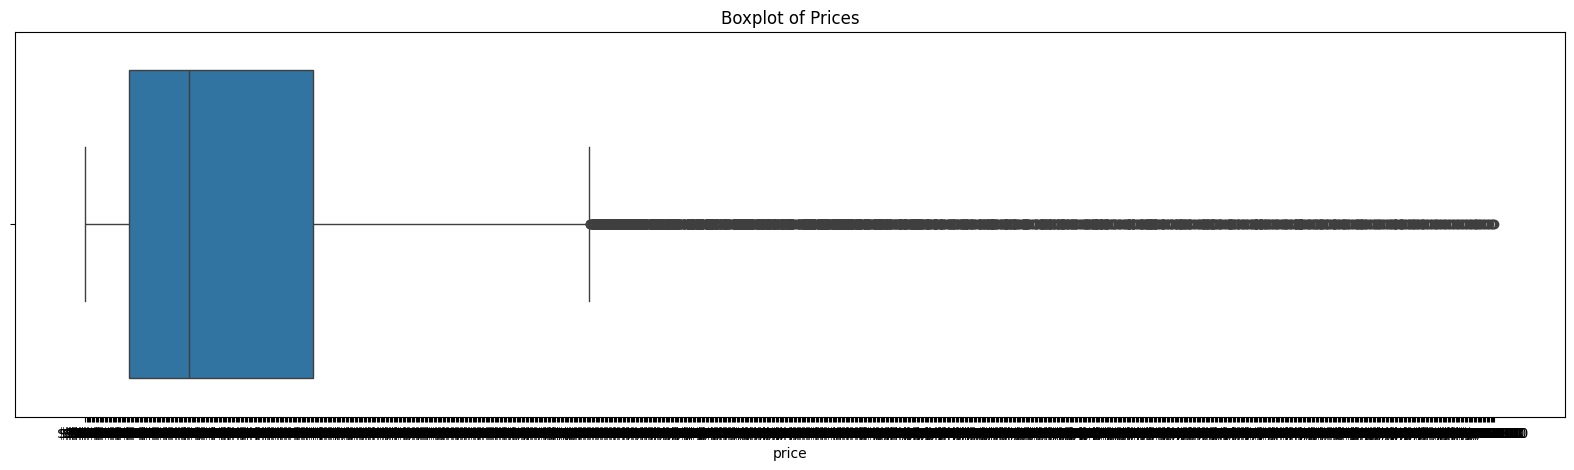

In [7]:
import seaborn as sns

plt.figure(figsize=(20,5))
sns.histplot(data['price'], bins=50, kde=True)
plt.title("Distribution of Airbnb Listing Prices")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(20,5))
sns.boxplot(x=data['price'])
plt.title("Boxplot of Prices")
plt.show()


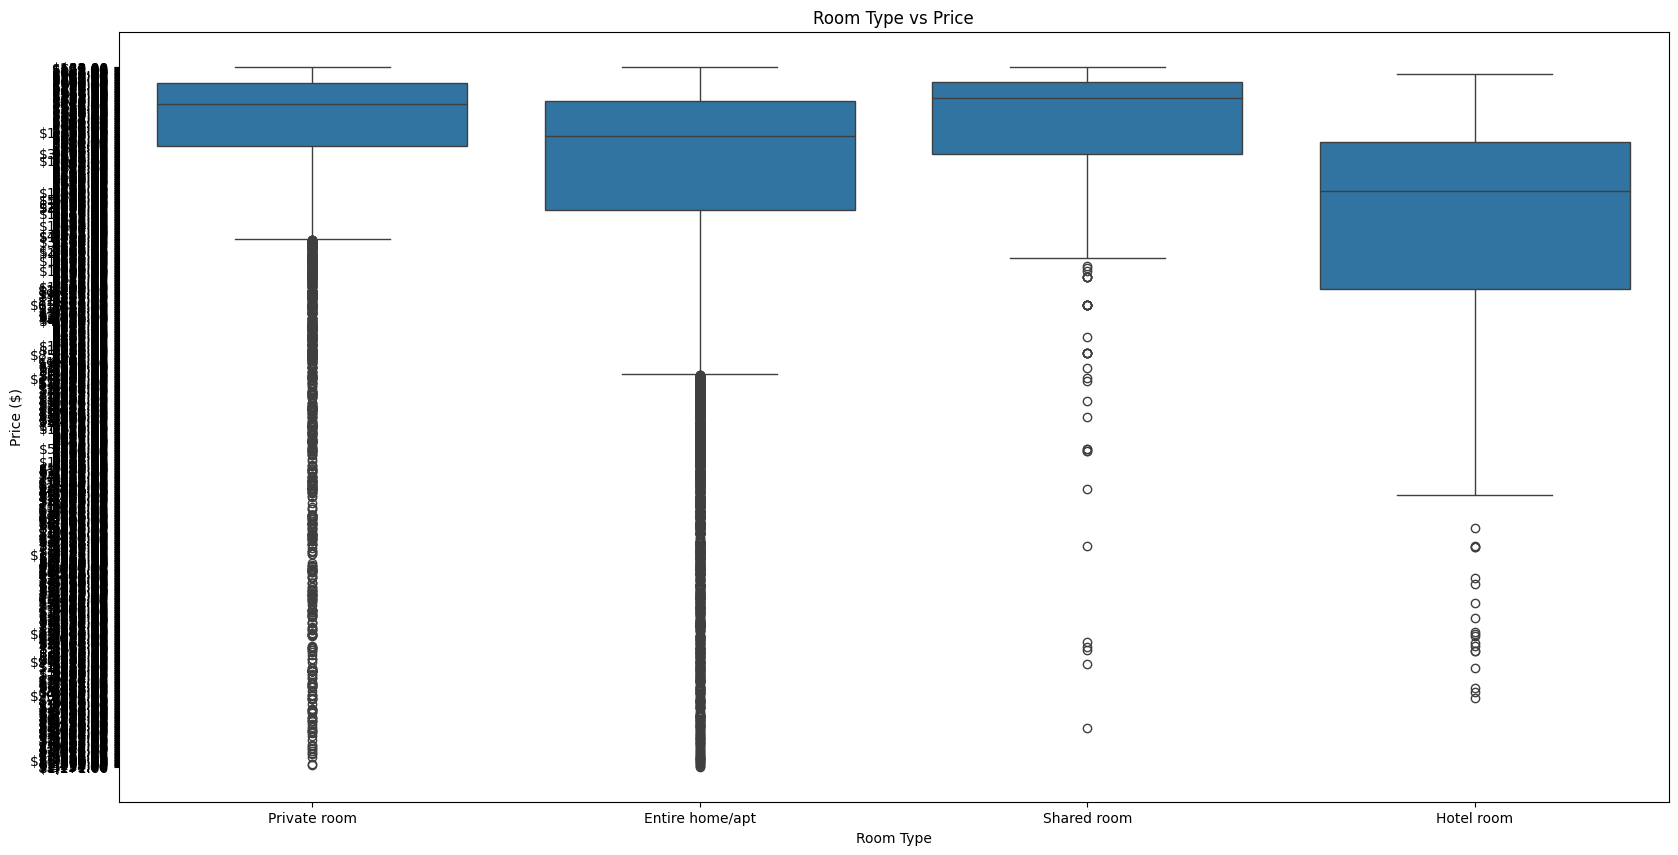

In [10]:
plt.figure(figsize=(20,10))
sns.boxplot(x='room_type', y='price', data=data)
plt.title("Room Type vs Price")
plt.xlabel("Room Type")
plt.ylabel("Price ($)")
plt.show()


<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\USER\AppData\Local\Temp\ipykernel_10360\2815854559.py:1: SyntaxWarning: invalid escape sequence '\$'
  data['price'] = data['price'].replace('[\$,]', '', regex = True).astype(float)


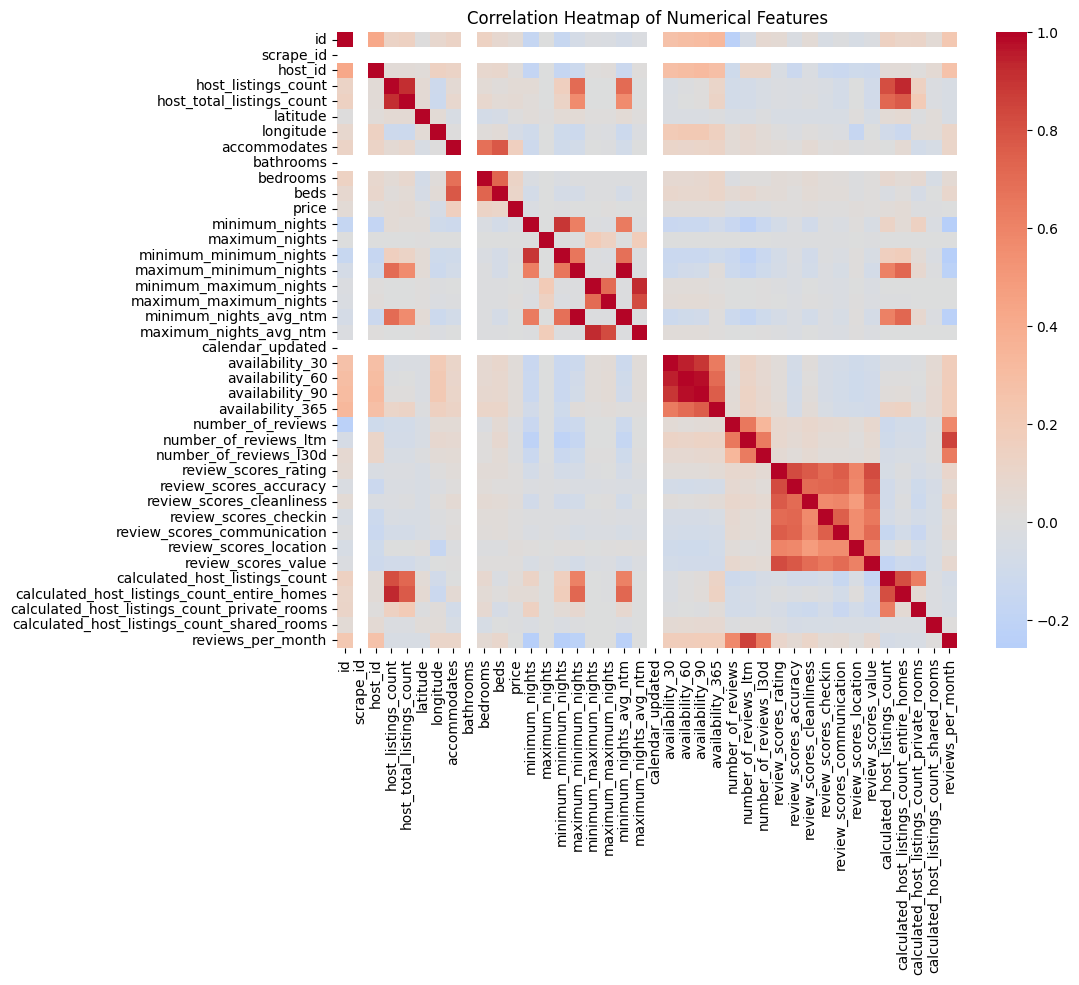

In [12]:
data['price'] = data['price'].replace('[\$,]', '', regex = True).astype(float)
numeric_data = data.select_dtypes(include=['float64','int64'])
corr = numeric_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()
